In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("ProjectTweets.csv")

In [3]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
len(df["_TheSpecialOne_"].unique())

659775

In [7]:
len(df["_TheSpecialOne_"])

1599999

In [18]:
df["_TheSpecialOne_"].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: _TheSpecialOne_, Length: 659775, dtype: int64

In [14]:
freq_counts = df["_TheSpecialOne_"].value_counts()

In [12]:
import matplotlib.pyplot as plt

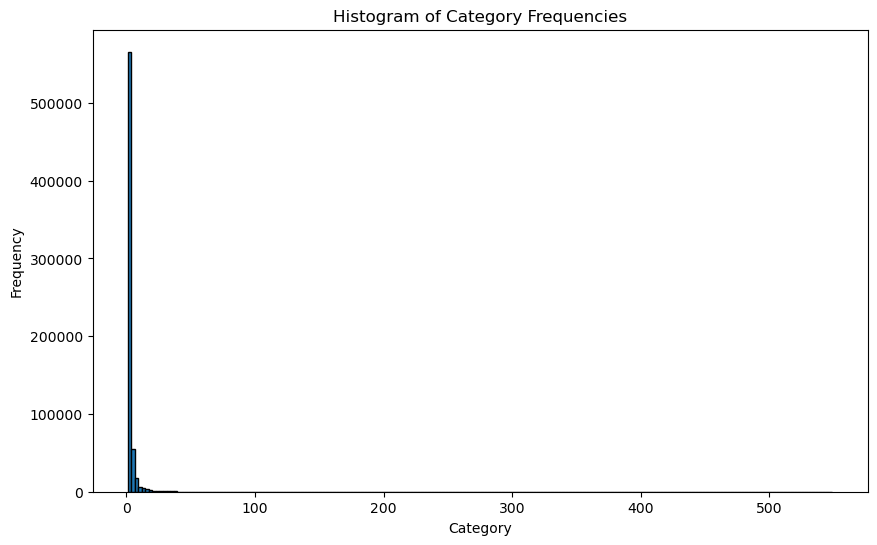

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(freq_counts, bins=200, edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Category Frequencies')
plt.show()

In [19]:
mult = [y for y in freq_counts if y > 1]

In [20]:
mult

[549,
 345,
 310,
 281,
 279,
 276,
 248,
 246,
 238,
 236,
 227,
 225,
 219,
 216,
 213,
 212,
 211,
 211,
 207,
 205,
 202,
 195,
 192,
 189,
 182,
 182,
 182,
 180,
 180,
 179,
 179,
 178,
 178,
 177,
 171,
 171,
 170,
 166,
 166,
 163,
 160,
 159,
 159,
 159,
 158,
 158,
 155,
 152,
 152,
 151,
 151,
 151,
 150,
 150,
 150,
 147,
 146,
 144,
 144,
 143,
 141,
 141,
 141,
 140,
 137,
 137,
 135,
 135,
 135,
 135,
 134,
 133,
 131,
 131,
 131,
 131,
 130,
 130,
 130,
 130,
 129,
 129,
 128,
 127,
 127,
 127,
 127,
 125,
 123,
 123,
 123,
 122,
 122,
 122,
 122,
 122,
 121,
 121,
 120,
 120,
 120,
 120,
 119,
 118,
 118,
 117,
 117,
 117,
 117,
 117,
 116,
 116,
 115,
 115,
 114,
 114,
 114,
 114,
 113,
 113,
 113,
 113,
 113,
 113,
 112,
 112,
 112,
 111,
 110,
 109,
 109,
 109,
 109,
 109,
 108,
 107,
 107,
 106,
 106,
 106,
 105,
 105,
 105,
 105,
 104,
 104,
 104,
 104,
 104,
 104,
 103,
 103,
 103,
 102,
 102,
 101,
 101,
 101,
 101,
 101,
 101,
 100,
 100,
 99,
 99,
 99,
 99,
 9

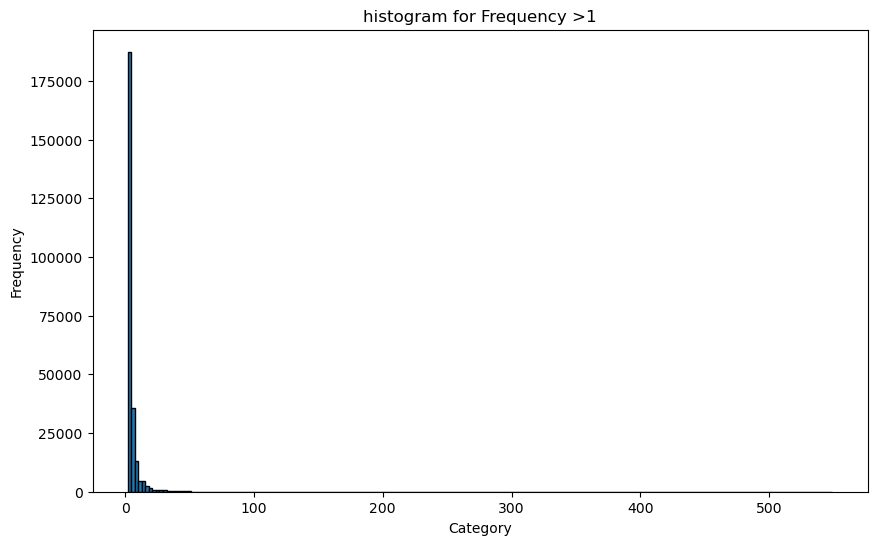

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(mult, bins=200, edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('histogram for Frequency >1')
plt.show()

In [22]:
mult10 = [y for y in freq_counts if y > 10]

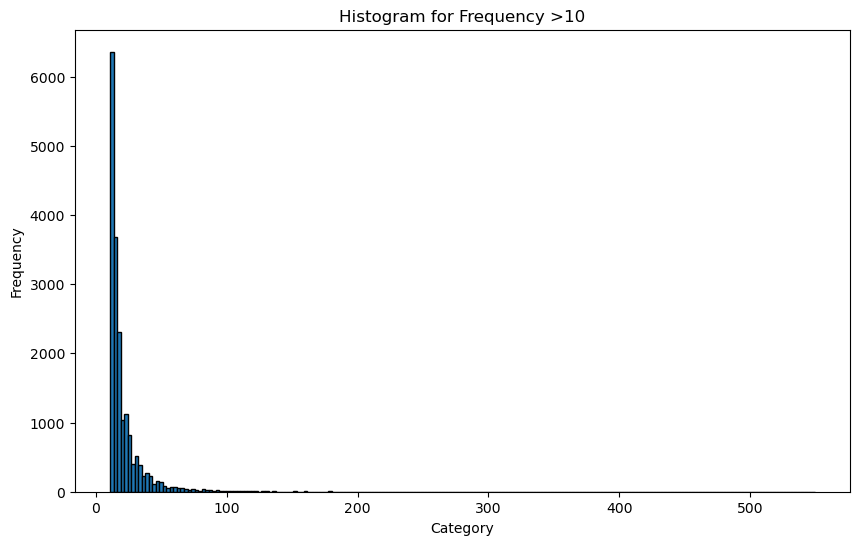

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(mult10, bins=200, edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram for Frequency >10')
plt.show()

clearly a lot of 1s, less 2s, less 3s and so on(mostly). how can I then extract valuable info from the people wbho contribute the most to the tweets.
possibly, I could go though the entire dataset and sentiment analysis various people? maybe look for a few pareto distributions. I don't really have any idea how this data was selected. this may or may not give me a clue.
would be super interesting to know that a subset of tweeters contribute to the majority of the negative sentiment. or +ve. but at the same time the amount tweets from multiple tweet tweeters is not very significant compared to the amount of tweets. however about 2/3 of tweets, ~960,000/1,600,000, or .6, is from multi tweet accounts. 

In [24]:
type(df["Mon Apr 06 22:19:45 PDT 2009"])

pandas.core.series.Series

In [30]:
df["date"] = pd.to_datetime(df["Mon Apr 06 22:19:45 PDT 2009"])

C:\Users\milo\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [32]:
from dateutil import tz
tzinfos = {'PDT': tz.tzlocal()}
df["date"] = pd.to_datetime(df["Mon Apr 06 22:19:45 PDT 2009"], tzinfos=tzinfos)

TypeError: to_datetime() got an unexpected keyword argument 'tzinfos'

In [31]:
df["date"].head()

0   2009-04-06 22:19:49
1   2009-04-06 22:19:53
2   2009-04-06 22:19:57
3   2009-04-06 22:19:57
4   2009-04-06 22:20:00
Name: date, dtype: datetime64[ns]

In [25]:
datet = df["Mon Apr 06 22:19:45 PDT 2009"].astype(datetime)
# I have datetime values as one of the columns can I get a freq count for various 
# sub bins of time steps(days, pairs of days, weeks, hours) 

NameError: name 'datetime' is not defined